22.503321693625253 103.21608040201005


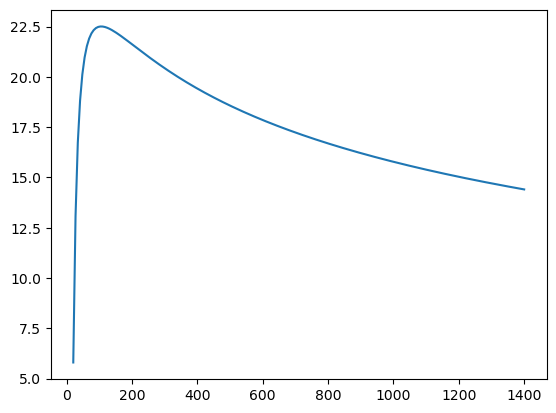

In [46]:
import numpy as np
from scipy.integrate import trapezoid
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

data = np.loadtxt('../Potentials/He-Beck1968_modified.table', skiprows=8)

phi = data[:,2]
r = data[:,1]

pot = interp1d(data[:, 1], data[:, 2])

N = 200

kb = 8.6173303e-5

T_arr = np.linspace(20, 1400, N)

B2 = np.zeros(T_arr.shape)

for i, T in enumerate(T_arr):

    beta = 1/(kb*T)
    y = ( 1 - np.exp(-beta*phi) ) * 2*np.pi*r**2

    trap = trapezoid(y, data[:,1])
    B2[i] = trap

plt.plot(T_arr, B2)

print(B2.max(), T_arr[B2.argmax()])